In [3192]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3193]:
# loading the heart dataset to a pandas DataFrame
heart_dataset = pd.read_csv('/content/heart.csv')

In [3194]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3195]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3196]:
heart_dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [3197]:
heart_dataset.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


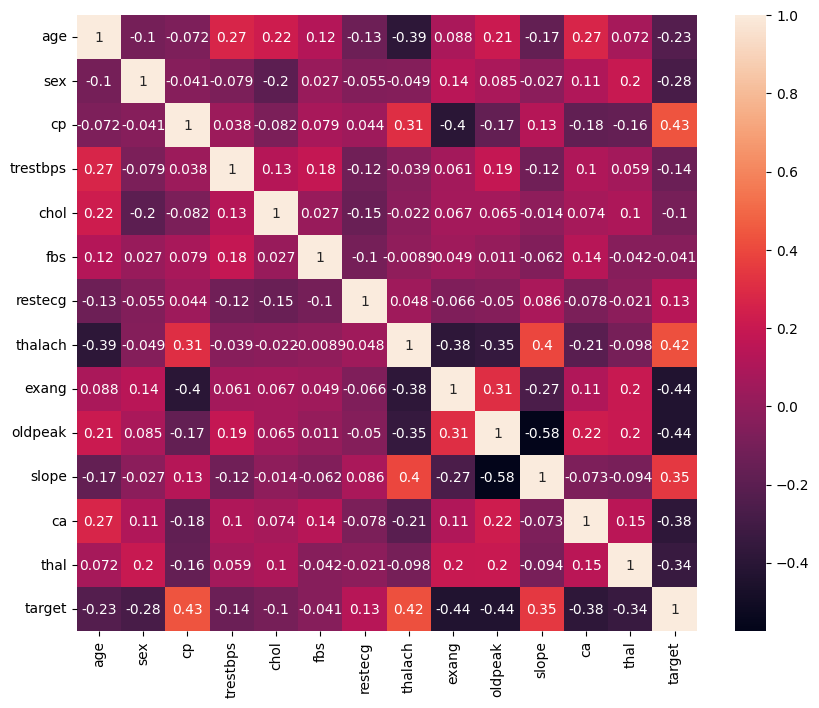

In [3198]:
plt.figure(figsize=(10,8))
sns.heatmap(data=heart_dataset.corr(),annot=True)
plt.show()

In [3199]:
heart_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [3200]:
heart_dataset.drop_duplicates(inplace=True)
heart_dataset.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
723,False
733,False
739,False
843,False


In [3201]:
heart_dataset.shape

(302, 14)

In [3202]:
X = heart_dataset.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [3203]:
Y=heart_dataset["target"]
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


In [3204]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267966,0.682656,-0.935208,-0.376556,-0.667728,-0.418446,0.901657,0.806035,-0.698344,-0.037124,0.979514,1.274980,1.119967
1,-0.157260,0.682656,-0.935208,0.478910,-0.841918,2.389793,-1.002541,0.237495,1.431958,1.773958,-2.271182,-0.714911,1.119967
2,1.724733,0.682656,-0.935208,0.764066,-1.403197,-0.418446,0.901657,-1.074521,1.431958,1.342748,-2.271182,-0.714911,1.119967
3,0.728383,0.682656,-0.935208,0.935159,-0.841918,-0.418446,0.901657,0.499898,-0.698344,-0.899544,0.979514,0.280034,1.119967
4,0.839089,-1.464866,-0.935208,0.364848,0.919336,2.389793,0.901657,-1.905464,-0.698344,0.739054,-0.645834,2.269926,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.503322,-1.464866,1.005911,-0.661712,-0.687083,-0.418446,-1.002541,-1.511859,-0.698344,0.394086,-0.645834,-0.714911,-0.513994
298,-1.153610,-1.464866,1.005911,-1.346085,-2.041893,-0.418446,0.901657,1.112172,-0.698344,-0.382092,-0.645834,-0.714911,-0.513994
299,-0.267966,0.682656,-0.935208,-0.205463,0.164513,-0.418446,0.901657,0.499898,1.431958,-0.899544,0.979514,0.280034,1.119967
300,0.506972,0.682656,1.976470,1.619532,0.512893,-0.418446,-1.002541,-1.074521,-0.698344,-0.899544,0.979514,-0.714911,-0.513994


In [3205]:
Y=heart_dataset["target"]
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


In [3206]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.4,random_state=179)

In [3207]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
275,-1.153610,0.682656,1.005911,0.478910,-0.222576,-0.418446,-1.002541,1.330842,-0.698344,-0.899544,0.979514,-0.714911,-0.513994
149,0.285561,0.682656,-0.935208,1.904688,0.822564,2.389793,-1.002541,-1.118255,-0.698344,-0.037124,-0.645834,2.269926,1.119967
183,0.839089,-1.464866,-0.935208,0.478910,2.854780,-0.418446,-1.002541,0.324963,-0.698344,0.135360,-0.645834,-0.714911,-0.513994
160,-1.375021,0.682656,1.976470,0.935159,-0.048386,-0.418446,-1.002541,1.243374,-0.698344,-0.209608,0.979514,1.274980,-0.513994
16,-0.046555,0.682656,-0.935208,-0.433587,0.377412,-0.418446,-1.002541,-1.774263,1.431958,0.997780,-0.645834,0.280034,1.119967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.489377,0.682656,-0.935208,1.049221,-0.067741,-0.418446,-1.002541,-0.943319,-0.698344,1.342748,-0.645834,-0.714911,1.119967
138,0.174856,0.682656,-0.935208,-0.091401,0.706437,2.389793,-1.002541,-2.036666,1.431958,0.480328,-2.271182,-0.714911,1.119967
292,0.064151,-1.464866,0.035352,0.193755,0.067741,-0.418446,-1.002541,0.499898,-0.698344,0.307844,-0.645834,-0.714911,-0.513994
202,0.396267,0.682656,-0.935208,-0.205463,0.241930,-0.418446,-1.002541,-0.855851,1.431958,1.687716,-0.645834,1.274980,1.119967


In [3208]:
Y_train

,target
541,1
185,0
255,1
205,1
17,0
...,...
212,0
171,0
691,1
291,0


In [3209]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [3210]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()





lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr.score(X_train,Y_train)*100,lr.score(X_test,Y_test)*100












----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[67 13]
 [16 86]]
Accuracy by confusion matrix: 0.8406593406593407


                       precision    recall  f1-score   support

without heart disease       0.81      0.84      0.82        80
   with heart disease       0.87      0.84      0.86       102

             accuracy                           0.84       182
            macro avg       0.84      0.84      0.84       182
         weighted avg       0.84      0.84      0.84       182

----------------------------------------------------------------------


(86.66666666666667, 84.06593406593407)

In [3211]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter configuration space
logreg_params = {
      'penalty': ['l1','l2'],
       'C': [0.01, 0.1, 1, 10],
       'solver': ['liblinear'],
       'max_iter': [100, 200, 500],
                  }






# Grid search with 3-fold cross-validation
lr_grid = GridSearchCV(lr, logreg_params, cv=3, n_jobs=-1)

# Fit the model on training data
lr_grid.fit(X_train, Y_train)

 # Best hyperparameters
print("Best Parameters:", lr_grid.best_params_)
print( lr_grid.best_estimator_)

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.01, solver='liblinear')


In [3212]:
lr_grid.fit(X_train,Y_train)
Y_pred = lr_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr_grid.score(X_train,Y_train)*100,lr_grid.score(X_test,Y_test)*100



----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[65 15]
 [14 88]]
Accuracy by confusion matrix: 0.8406593406593407


                       precision    recall  f1-score   support

without heart disease       0.82      0.81      0.82        80
   with heart disease       0.85      0.86      0.86       102

             accuracy                           0.84       182
            macro avg       0.84      0.84      0.84       182
         weighted avg       0.84      0.84      0.84       182

----------------------------------------------------------------------


(85.0, 84.06593406593407)

In [3213]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
knn.score(X_train,Y_train)*100,knn.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[72  8]
 [41 61]]
Accuracy by confusion matrix: 0.7307692307692307


                       precision    recall  f1-score   support

without heart disease       0.64      0.90      0.75        80
   with heart disease       0.88      0.60      0.71       102

             accuracy                           0.73       182
            macro avg       0.76      0.75      0.73       182
         weighted avg       0.78      0.73      0.73       182

----------------------------------------------------------------------


(89.16666666666667, 73.07692307692307)

In [3214]:
#KNN
from sklearn.model_selection import GridSearchCV
knn_params = {
    'n_neighbors': [2,5,7,12,15],
    }
# Grid search with 3-fold cross-validation
Knn = GridSearchCV(knn, knn_params, cv=3)

# Fit the model on training data
Knn.fit(X_train, Y_train)

# Best hyperparameters
print("Best Parameters:", Knn.best_params_)
print( Knn.best_estimator_)


Best Parameters: {'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)


In [3215]:


Knn.fit(X_train,Y_train)
Y_pred = Knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
Knn.score(X_train,Y_train)*100,Knn.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[61 19]
 [16 86]]
Accuracy by confusion matrix: 0.8076923076923077


                       precision    recall  f1-score   support

without heart disease       0.79      0.76      0.78        80
   with heart disease       0.82      0.84      0.83       102

             accuracy                           0.81       182
            macro avg       0.81      0.80      0.80       182
         weighted avg       0.81      0.81      0.81       182

----------------------------------------------------------------------


(85.0, 80.76923076923077)

In [3216]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt.score(X_train,Y_train)*100,dt.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[64 16]
 [30 72]]
Accuracy by confusion matrix: 0.7472527472527473


                       precision    recall  f1-score   support

without heart disease       0.68      0.80      0.74        80
   with heart disease       0.82      0.71      0.76       102

             accuracy                           0.75       182
            macro avg       0.75      0.75      0.75       182
         weighted avg       0.76      0.75      0.75       182

----------------------------------------------------------------------


(100.0, 74.72527472527473)

[Text(0.53125, 0.9375, 'x[9] <= -0.08\ngini = 0.499\nsamples = 120\nvalue = [58.0, 62.0]'),
 Text(0.265625, 0.8125, 'x[7] <= 0.041\ngini = 0.358\nsamples = 60\nvalue = [14, 46]'),
 Text(0.3984375, 0.875, 'True  '),
 Text(0.125, 0.6875, 'x[6] <= -0.05\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.0625, 0.5625, 'x[12] <= -2.148\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.03125, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09375, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.1875, 0.5625, 'x[8] <= 0.367\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.15625, 0.4375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.21875, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.40625, 0.6875, 'x[11] <= -0.217\ngini = 0.258\nsamples = 46\nvalue = [7, 39]'),
 Text(0.3125, 0.5625, 'x[4] <= 0.503\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(0.28125, 0.4375, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.34375, 0.4375, 'x[

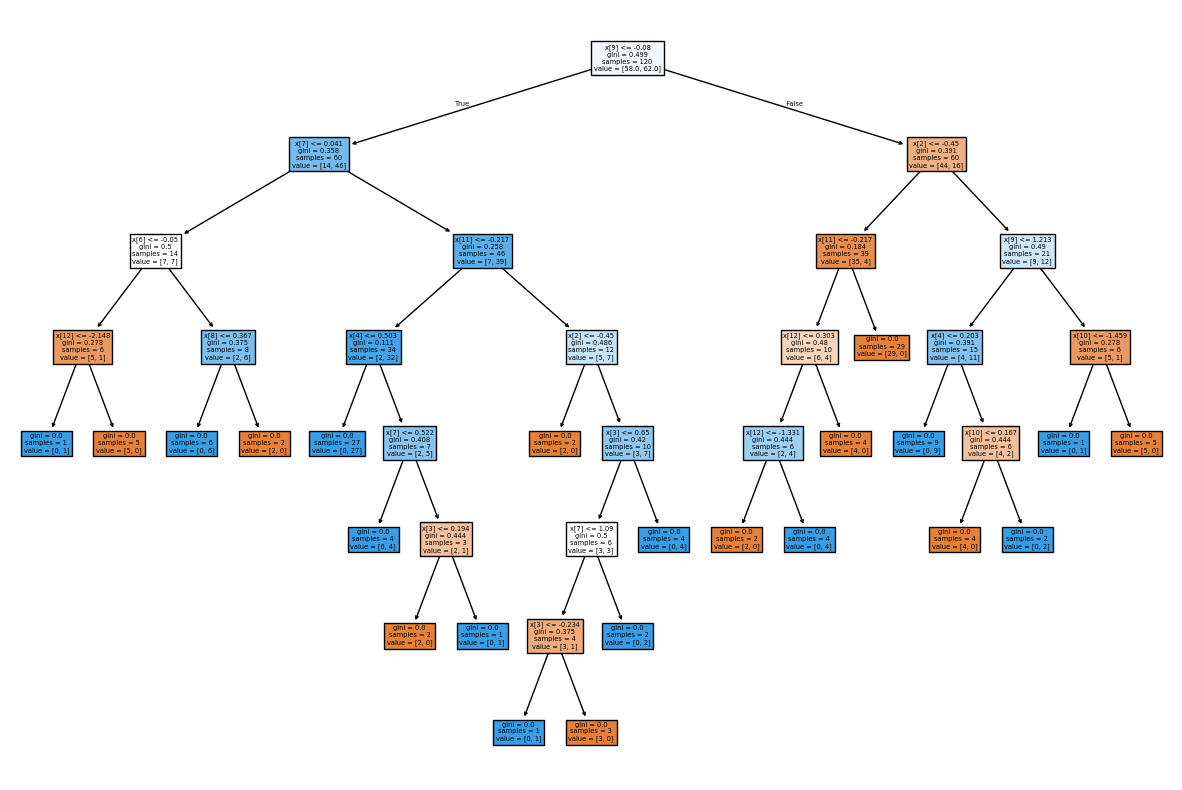

In [3217]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [3218]:

dt_params = {
      'criterion': ['gini', 'entropy'],
      'splitter': ['best', 'random'],
      'max_depth': [3, 5, 10, 15],
      'max_features': ['sqrt', 'log2']
                  }




dt_grid= GridSearchCV(dt,param_grid = dt_params,cv = 3)
dt_grid.fit(X_train,Y_train)
# Best hyperparameters
print("Best Parameters:", dt_grid.best_params_)
print( dt_grid.best_estimator_)


Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'splitter': 'best'}
DecisionTreeClassifier(max_depth=15, max_features='sqrt')


In [3219]:
dt_grid.fit(X_train,Y_train)
Y_pred = dt_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt_grid.score(X_train,Y_train)*100,dt_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[42 38]
 [13 89]]
Accuracy by confusion matrix: 0.7197802197802198


                       precision    recall  f1-score   support

without heart disease       0.76      0.53      0.62        80
   with heart disease       0.70      0.87      0.78       102

             accuracy                           0.72       182
            macro avg       0.73      0.70      0.70       182
         weighted avg       0.73      0.72      0.71       182

----------------------------------------------------------------------


(76.66666666666667, 71.97802197802197)

In [3220]:
#58	0	0	100	248	0	0	122	0	1.0	1	0	2
input_data = (58,0,0,100,248,0,0,122,0,1.0,1,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr_grid.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease ❤️')
else:
  print('The Person has Heart Disease 💔')

[1]
The Person has Heart Disease 💔


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [3221]:
import pickle

In [3222]:
filename = 'heart_data.pkl'
pickle.dump(lr_grid, open(filename, 'wb'))